# Frequent value imputation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('datasets/train-categorical.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

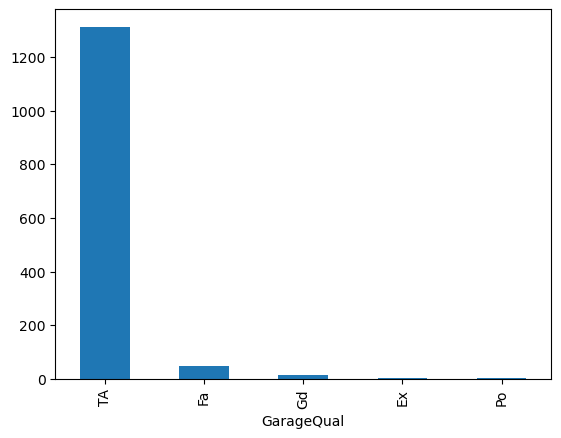

In [7]:
df['GarageQual'].value_counts().plot(kind='bar')

In [8]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

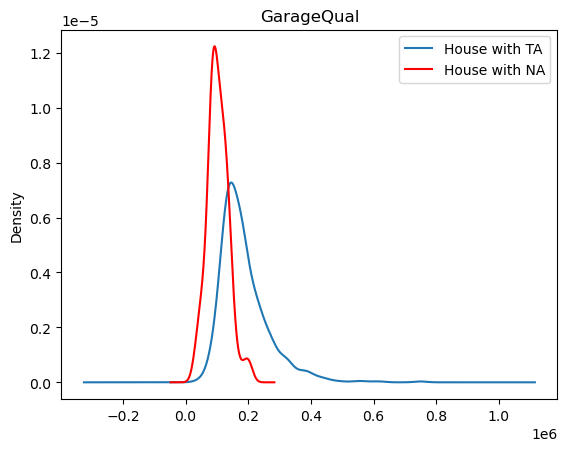

In [9]:
fig = plt.figure()
ax= fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde',ax= ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax= ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with TA','House with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [11]:
temp = df[df['GarageQual'] =='TA']['SalePrice']

In [12]:
df['GarageQual'].fillna('TA',inplace = True)

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_1528\2002206944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace = True)


<Axes: xlabel='GarageQual'>

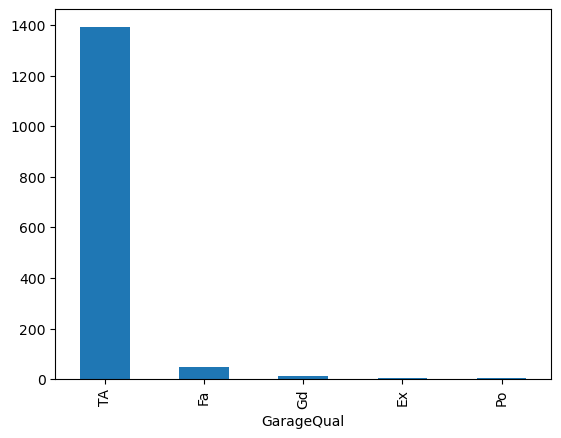

In [14]:
df['GarageQual'].value_counts().plot(kind= 'bar')

Text(0.5, 1.0, 'GarageQual')

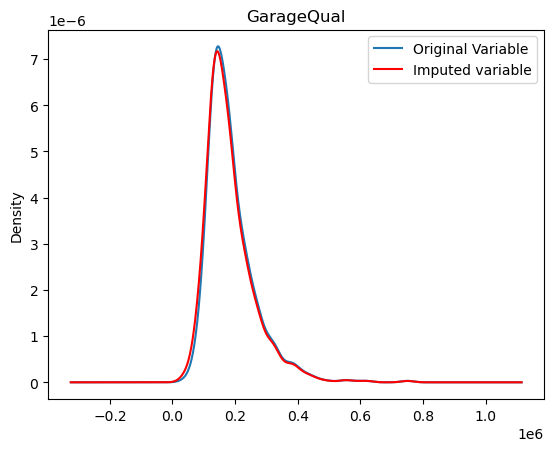

In [15]:
fig = plt.figure()
ax= fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax= ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Variable','Imputed variable']
ax.legend(lines,labels,loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

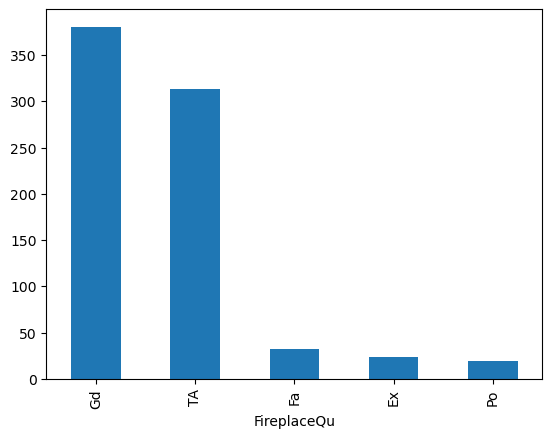

In [16]:
df['FireplaceQu'].value_counts().plot(kind= 'bar')

In [17]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

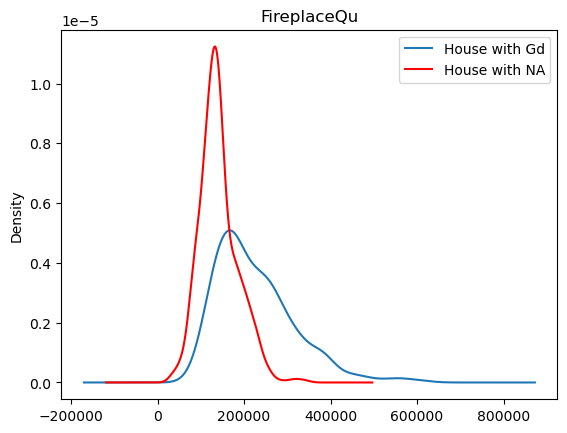

In [18]:
fig = plt.figure()
ax= fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde',ax= ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax= ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with Gd','House with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [19]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [20]:
df['FireplaceQu'].fillna('Gd',inplace=True)

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_1528\891419280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

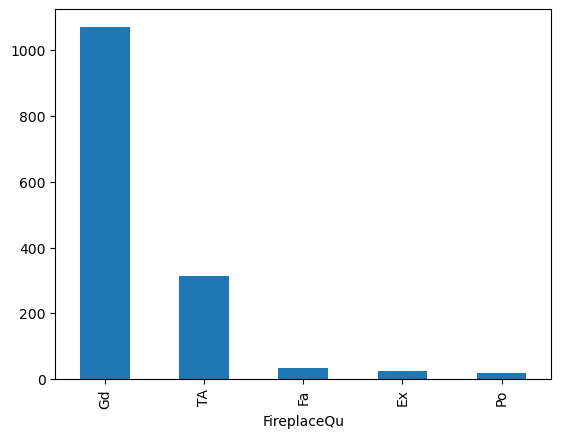

In [22]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

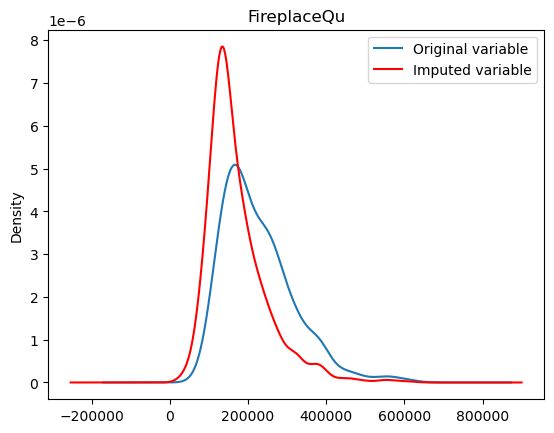

In [23]:

fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

# From Sklearn

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [27]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [29]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Missing Category imputation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('datasets/train-categorical.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [33]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [34]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

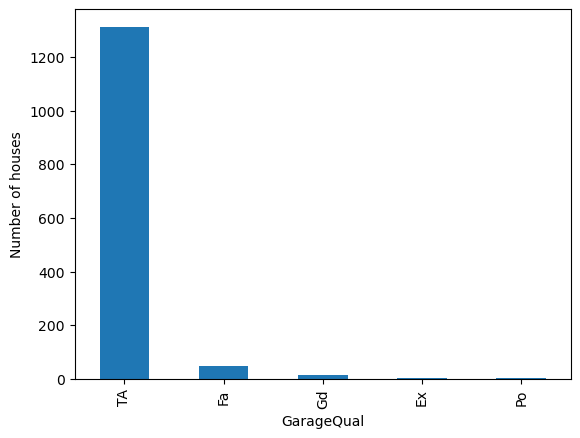

In [35]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [36]:
df['GarageQual'].fillna('Missing', inplace=True)


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_1528\4101878677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

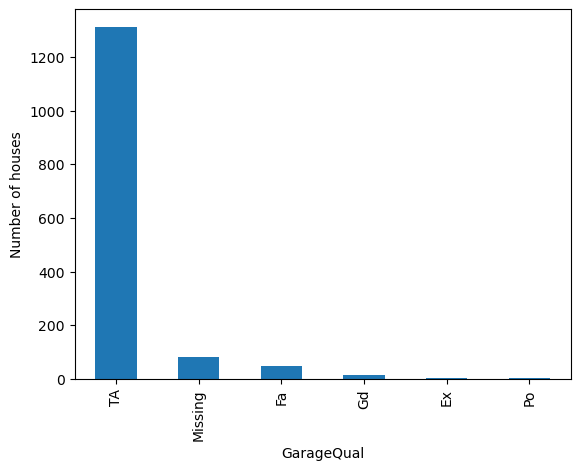

In [37]:

df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

# From Sklearn

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [39]:
from sklearn.impute import SimpleImputer


In [40]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')


In [41]:

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [42]:
imputer.statistics_


array(['Missing', 'Missing'], dtype=object)